# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [8]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18737768,
            "id": 1,
            "last_updated": 1624002586,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 709897436135,
                    "percent_change_1h": 0.590463186050611,
                    "percent_change_24h": -4.00311775063337,
                    "percent_change_7d": 2.66265433002456,
                    "percentage_change_1h": 0.590463186050611,
                    "percentage_change_24h": -4.00311775063337,
                    "percentage_change_7d": 2.66265433002456,
                    "price": 37886.0,
                    "volume_24h": 36164237525
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18737768,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [15]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 116338674,
            "id": 1027,
            "last_updated": 1624002851,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 273865461164,
                    "percent_change_1h": 0.64443000121204,
                    "percent_change_24h": -4.23318580289482,
                    "percent_change_7d": -5.37441781704345,
                    "percentage_change_1h": 0.64443000121204,
                    "percentage_change_24h": -4.23318580289482,
                    "percentage_change_7d": -5.37441781704345,
                    "price": 2352.96,
                    "volume_24h": 25112647133
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 116338674,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [13]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f'The current price of btc is {btc_price}.')


The current price of btc is 37886.0.


In [17]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f'The current price of eth is {eth_price}.')


The current price of eth is 2352.96.


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [18]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f'The current value of btc is {btc_value}.')


The current value of btc is 45463.2.


In [19]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f'The current value of eth is {eth_value}.')


The current value of eth is 12470.688.


In [20]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f'The current value of the cryptocurrency wallet is {total_crypto_wallet}.')


The current value of the cryptocurrency wallet is 57933.888.


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [21]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [57]:
# Set the variables for the Alpaca API and secret keys
# Load .env environment variables
load_dotenv()
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [68]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1D 
timeframe = '1D'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [69]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()

AGG                                        SPY  \
                             open    high      low    close   volume    open   
time                                                                           
2020-08-07 00:00:00-04:00  119.66  119.73  119.395  119.445  8830420  333.28   

                                                            
                             high    low   close    volume  
time                                                        
2020-08-07 00:00:00-04:00  334.88  332.3  334.55  98710236

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [29]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = df_portfolio['AGG']['close'][0]

# Print the AGG closing price
agg_close_price

119.445

In [28]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = df_portfolio['SPY']['close'][0]

# Print the SPY closing price
spy_close_price


334.55

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [30]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
agg_value


23889.0

In [31]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
spy_value

36800.5

In [32]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value
# Print the current balance of the stock and bond portion of the portfolio
total_stocks_bonds

60689.5

In [33]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
total_portfolio

118623.388

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [35]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[57933.888, 60689.5]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [36]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data,columns=['amount'], index=['crypto', 'stock/bond'])

# Display the savings_df DataFrame
savings_df


,amount
crypto,57933.888
stock/bond,60689.500


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Total Vale of portfolio'}, ylabel='amount'>

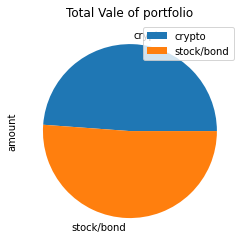

In [38]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title='Total Vale of portfolio')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [50]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 *  monthly_income

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [51]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print('Congratulations you have enough money to create an emergency fund!')
elif total_portfolio == emergency_fund_value:
    print('Congratulations you just reached an important financial goal. You can start to save an emergency fund.')
else:
    print(f'You are ${emergency_fund_value - total_portfolio:,.2f} away from reaching your goal.')

Congratulations you have enough money to create an emergency fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [88]:
# Set start and end dates of 10 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 10 years back from that date 
# Set most recent dates first, because alpaca has a limit of 1000
# So we need to call three times because we want 10 years data of 10 * 252 = 2520
start_date = pd.Timestamp("2010-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()



2520

In [96]:
# Use the Alpaca get_barset function to make the API call to get the 10 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame

#  Frist modified dates and call
start_date = pd.Timestamp("2016-08-18", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

yr_10_prices_1_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

#  Second modified dates and call
start_date = pd.Timestamp("2012-08-27", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2016-08-17", tz="America/New_York").isoformat()

yr_10_prices_2_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

#  Third modified dates and call
start_date = pd.Timestamp("2010-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2012-08-26", tz="America/New_York").isoformat()

yr_10_prices_3_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df


# Display both the first and last five rows of the DataFrame
full_yr_10_prices_df = pd.concat([yr_10_prices_3_df, yr_10_prices_2_df, yr_10_prices_1_df], axis=0)
display(full_yr_10_prices_df)

AGG                                          \
                             open     high       low    close      volume   
time                                                                        
2010-08-09 00:00:00-04:00  107.66  107.680  107.5300  107.630    478988.0   
2010-08-10 00:00:00-04:00  107.63  107.920  107.5600  107.830    532447.0   
2010-08-11 00:00:00-04:00  107.91  107.956  107.7900  107.910    665686.0   
2010-08-12 00:00:00-04:00  107.93  107.980  107.6700  107.740    640614.0   
2010-08-13 00:00:00-04:00  107.77  108.000  107.6700  108.000    563778.0   
...                           ...      ...       ...      ...         ...   
2020-08-03 00:00:00-04:00  119.37  119.400  119.1903  119.400  17837420.0   
2020-08-04 00:00:00-04:00  119.42  119.630  119.4200  119.630  21512268.0   
2020-08-05 00:00:00-04:00  119.39  119.490  119.3100  119.400  34175883.0   
2020-08-06 00:00:00-04:00  119.62  119.730  119.5300  119.580   9009216.0   
2020-08-07 00:00:00-04:00  119.66  119.730  119.3950  119.445   8830420.0   

                                SPY                                         
                               open    high       low     close     volume  
time                                                                        
2010-08-09 00:00:00-04:00  112.9200  113.18  112.3200  112.9801   89387651  
2010-08-10 00:00:00-04:00  112.0300  112.98  111.3701  112.4200  202262432  
2010-08-11 00:00:00-04:00  110.6500  110.69  109.1200  109.2901  223970698  
2010-08-12 00:00:00-04:00  107.6400  109.02  107.6000  108.6400  190434932  
2010-08-13 00:00:00-04:00  108.2900  108.96  108.1800  108.3000  130664078  
...                             ...     ...       ...       ...        ...  
2020-08-03 00:00:00-04:00  328.3200  329.62  327.7300  328.7600   71741125  
2020-08-04 00:00:00-04:00  327.8600  330.06  327.8600  330.0300   73684427  
2020-08-05 00:00:00-04:00  331.4700  332.39  331.1800  332.0600   72846458  
2020-08-06 00:00:00-04:00  331.4799  334.46  331.1300  334.3100   76900649  
2020-08-07 00:00:00-04:00  333.2800  334.88  332.3000  334.5500   98710236  

[2518 rows x 10 columns]

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [98]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_40_AGG_60_SPY = MCSimulation(
    portfolio_data = full_yr_10_prices_df,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
MC_40_AGG_60_SPY.portfolio_data.head()

AGG                                     \
                             open     high     low   close    volume   
time                                                                   
2010-08-09 00:00:00-04:00  107.66  107.680  107.53  107.63  478988.0   
2010-08-10 00:00:00-04:00  107.63  107.920  107.56  107.83  532447.0   
2010-08-11 00:00:00-04:00  107.91  107.956  107.79  107.91  665686.0   
2010-08-12 00:00:00-04:00  107.93  107.980  107.67  107.74  640614.0   
2010-08-13 00:00:00-04:00  107.77  108.000  107.67  108.00  563778.0   

                                           SPY                              \
                          daily_return    open    high       low     close   
time                                                                         
2010-08-09 00:00:00-04:00          NaN  112.92  113.18  112.3200  112.9801   
2010-08-10 00:00:00-04:00     0.001858  112.03  112.98  111.3701  112.4200   
2010-08-11 00:00:00-04:00     0.000742  110.65  110.69  109.1200  109.2901   
2010-08-12 00:00:00-04:00    -0.001575  107.64  109.02  107.6000  108.6400   
2010-08-13 00:00:00-04:00     0.002413  108.29  108.96  108.1800  108.3000   

                                                   
                              volume daily_return  
time                                               
2010-08-09 00:00:00-04:00   89387651          NaN  
2010-08-10 00:00:00-04:00  202262432    -0.004958  
2010-08-11 00:00:00-04:00  223970698    -0.027841  
2010-08-12 00:00:00-04:00  190434932    -0.005948  
2010-08-13 00:00:00-04:00  130664078    -0.003130

In [99]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_40_AGG_60_SPY.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006572,1.000831,1.002945,1.002743,0.992512,1.004625,0.998606,0.993105,0.993421,1.012487,...,1.004070,1.004779,1.017574,1.014152,1.003529,0.998427,1.004585,1.004354,0.996331,1.014424
2,1.012104,1.007888,1.009927,1.000735,0.996567,1.008577,1.005507,0.998914,1.003702,1.018005,...,0.997887,1.009771,1.019144,1.015848,0.988936,0.997284,1.016550,1.008569,0.999591,1.021622
3,1.000272,1.014646,1.014921,0.990617,0.995631,1.014139,1.011498,0.996125,0.997113,1.017688,...,0.999060,1.014056,1.029084,1.031356,0.993812,1.004187,1.005489,0.994080,0.998228,1.030920
4,0.996887,1.013704,1.021334,0.991010,0.991904,1.015374,1.013622,0.991477,0.996217,1.012258,...,1.011595,1.011851,1.019336,1.035684,0.993223,0.998970,1.008808,0.999338,1.007654,1.026613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.776060,11.507783,5.825764,4.560098,9.762421,13.713677,5.980493,4.933498,24.674422,11.489399,...,18.691198,5.998513,7.537086,12.771247,5.332768,6.188805,4.416484,12.912558,6.664070,40.979745
7557,8.725278,11.493763,5.794216,4.587571,9.720401,13.836003,5.911389,4.891225,24.539012,11.487051,...,18.749668,6.017345,7.521056,12.949559,5.357499,6.132656,4.432237,12.966558,6.674480,41.489039
7558,8.679988,11.390770,5.784718,4.611510,9.687558,13.903964,5.967375,4.964168,24.486736,11.398555,...,18.643811,6.072145,7.534360,12.904908,5.408366,6.197918,4.462349,12.998265,6.711658,41.566404
7559,8.656338,11.386254,5.810421,4.653950,9.710136,13.694916,5.924536,4.973094,24.630655,11.383864,...,18.776472,6.058072,7.561056,13.050205,5.516347,6.168670,4.458849,12.958078,6.696845,41.532274


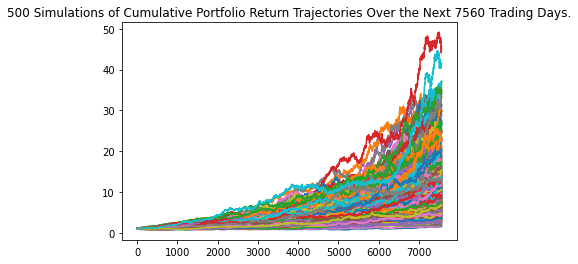

In [100]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_40_ACG_60_SPY_line_plot = MC_40_AGG_60_SPY.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

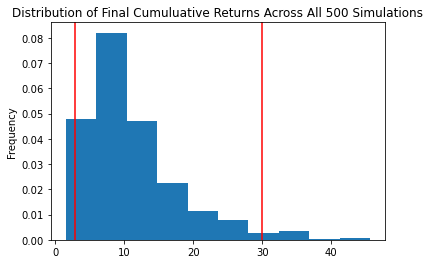

In [101]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_40_ACG_60_SPY_distribution_plot =  MC_40_AGG_60_SPY.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [102]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_40_AGG_60_SPY_table = MC_40_AGG_60_SPY.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
display(MC_40_AGG_60_SPY_table)

count           500.000000
mean             11.213028
std               7.039050
min               1.525103
25%               6.198962
50%               9.257054
75%              14.017173
max              45.651782
95% CI Lower      2.854223
95% CI Upper     29.928293
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [104]:
# Print the current balance of the stock and bond portion of the members portfolio
display(total_stocks_bonds)

60689.5

In [106]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(MC_40_AGG_60_SPY_table[8]*total_stocks_bonds,2)
ci_upper_thirty_cumulative_return = round(MC_40_AGG_60_SPY_table[9]*total_stocks_bonds,2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds:,.2f} in the portfolio"
      f" with 40% in ACG and 60% in SPY weighted portfolio over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return:,.2f} and ${ci_upper_thirty_cumulative_return:,.2f}.")

There is a 95% chance that an initial investment of $60,689.50 in the portfolio with 40% in ACG and 60% in SPY weighted portfolio over the next 30 years will end within in the range of $173,221.34 and $1,816,333.15.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [108]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_20_AGG_80_SPY = MCSimulation(
    portfolio_data = full_yr_10_prices_df,
    weights = [.2,.8],
    num_simulation = 500,
    num_trading_days = 252*10
)
# Review the simulation input data
MC_20_AGG_80_SPY.portfolio_data.head()


AGG                                     \
                             open     high     low   close    volume   
time                                                                   
2010-08-09 00:00:00-04:00  107.66  107.680  107.53  107.63  478988.0   
2010-08-10 00:00:00-04:00  107.63  107.920  107.56  107.83  532447.0   
2010-08-11 00:00:00-04:00  107.91  107.956  107.79  107.91  665686.0   
2010-08-12 00:00:00-04:00  107.93  107.980  107.67  107.74  640614.0   
2010-08-13 00:00:00-04:00  107.77  108.000  107.67  108.00  563778.0   

                                           SPY                              \
                          daily_return    open    high       low     close   
time                                                                         
2010-08-09 00:00:00-04:00          NaN  112.92  113.18  112.3200  112.9801   
2010-08-10 00:00:00-04:00     0.001858  112.03  112.98  111.3701  112.4200   
2010-08-11 00:00:00-04:00     0.000742  110.65  110.69  109.1200  109.2901   
2010-08-12 00:00:00-04:00    -0.001575  107.64  109.02  107.6000  108.6400   
2010-08-13 00:00:00-04:00     0.002413  108.29  108.96  108.1800  108.3000   

                                                   
                              volume daily_return  
time                                               
2010-08-09 00:00:00-04:00   89387651          NaN  
2010-08-10 00:00:00-04:00  202262432    -0.004958  
2010-08-11 00:00:00-04:00  223970698    -0.027841  
2010-08-12 00:00:00-04:00  190434932    -0.005948  
2010-08-13 00:00:00-04:00  130664078    -0.003130

In [109]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_20_AGG_80_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999158,1.022441,0.993262,1.000128,1.004402,1.016427,0.984251,0.993136,0.995900,0.998012,...,1.005243,1.003731,1.022791,1.000203,1.006410,0.996819,0.995724,1.005198,0.992730,0.987392
2,1.004264,1.027891,0.990621,0.990219,1.016757,1.010076,0.982954,0.991337,0.992967,1.002536,...,1.001851,1.004113,1.024911,0.999215,1.020841,1.001085,1.005546,1.037199,1.003495,0.985419
3,1.009942,1.017766,0.993765,0.992951,1.024640,1.004125,0.972646,1.010188,0.981935,1.012712,...,1.013580,0.999948,1.021248,0.997699,1.021832,1.008533,0.994041,1.040866,1.011898,0.987253
4,1.018884,1.020318,0.990544,0.989117,1.027302,1.006550,0.971494,1.004841,0.970537,1.021065,...,1.000348,1.002440,1.015851,0.996516,1.030178,1.004674,1.000629,1.031804,1.007474,0.978587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.012301,3.150788,4.696326,3.247447,1.675693,4.647125,2.700364,4.446100,5.558806,5.619438,...,2.691724,3.621978,2.116554,1.742346,2.744703,2.915361,2.194708,2.661195,2.852098,1.684035
2517,2.017239,3.122078,4.727698,3.238291,1.677212,4.610461,2.699984,4.438891,5.512553,5.642344,...,2.674586,3.632606,2.133961,1.719662,2.727838,2.936469,2.222268,2.666638,2.867393,1.692104
2518,2.012429,3.131174,4.827907,3.223150,1.687247,4.578613,2.720182,4.470922,5.554186,5.701599,...,2.667835,3.601431,2.155012,1.705170,2.700803,2.938234,2.182619,2.675830,2.846646,1.693242
2519,2.054285,3.162890,4.872932,3.226156,1.685676,4.565585,2.727941,4.505536,5.496648,5.700960,...,2.692298,3.628502,2.125178,1.720193,2.720067,2.932420,2.171565,2.689559,2.874538,1.699704


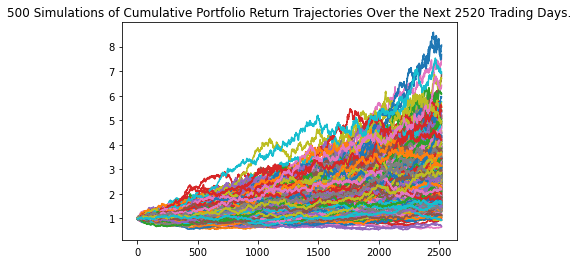

In [110]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_20_ACG_80_SPY_line_plot = MC_20_AGG_80_SPY.plot_simulation()

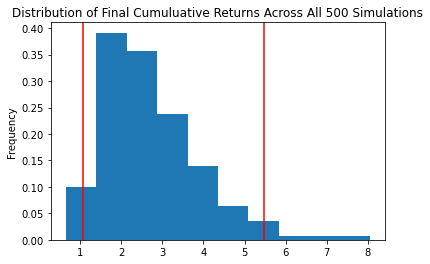

In [112]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_20_ACG_80_SPY_distribution_plot =  MC_20_AGG_80_SPY.plot_distribution()

In [113]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_20_AGG_80_SPY_table = MC_20_AGG_80_SPY.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
display(MC_20_AGG_80_SPY_table)

count           500.000000
mean              2.715999
std               1.198076
min               0.649094
25%               1.784218
50%               2.515733
75%               3.328963
max               8.059166
95% CI Lower      1.068131
95% CI Upper      5.472693
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [114]:
# Print the current balance of the stock and bond portion of the members portfolio
display(total_stocks_bonds)


60689.5

In [115]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(MC_20_AGG_80_SPY_table[8]*total_stocks_bonds,2)
ci_upper_ten_cumulative_return = round(MC_20_AGG_80_SPY_table[9]*total_stocks_bonds,2)

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds:,.2f} in the portfolio"
      f" with 20% in ACG and 80% in SPY weighted portfolio over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return:,.2f} and ${ci_upper_ten_cumulative_return:,.2f}.")


There is a 95% chance that an initial investment of $60,689.50 in the portfolio with 20% in ACG and 80% in SPY weighted portfolio over the next 10 years will end within in the range of $64,824.36 and $332,135.03.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?